# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Análise dados - Churn Telecon</p></div>


## Problema négocio - Churn Telecon

O problema da perda de clientes, ou "churn", é um desafio significativo para as empresas de telecomunicações (telcos). O churn pode ocorrer por diversas razões, como insatisfação do cliente, competição de outras empresas, mudanças nas preferências do consumidor ou problemas de serviço. Aqui estão algumas estratégias que as telcos podem considerar para enfrentar esse problema

**A) Análise de dados:** Utilizar análises avançadas de dados para identificar padrões e sinais de alerta precoce de clientes que estão em risco de abandonar o serviço. Isso pode incluir análises de comportamento do cliente, padrões de uso, feedback do serviço ao cliente, entre outros.

**B) Segmentação de clientes:** Segmentar os clientes em grupos com base em seu comportamento, histórico de uso, preferências e valor para a empresa. Isso permite direcionar estratégias específicas para cada segmento, como ofertas personalizadas, promoções ou melhorias no serviço.
Melhoria da experiência do cliente: Focar em melhorar a experiência do cliente em todos os pontos de contato, desde a qualidade do serviço até o atendimento ao cliente. As telcos podem implementar programas de treinamento para representantes de serviço ao cliente, simplificar processos de faturamento, melhorar a qualidade da rede, etc.

**C) Ofertas e promoções personalizadas:** Utilizar técnicas de análise preditiva para antecipar as necessidades e preferências individuais dos clientes e oferecer ofertas e promoções personalizadas que aumentem a retenção.

**D) Programas de fidelização:** Implementar programas de fidelização que recompensem a lealdade do cliente com benefícios exclusivos, descontos, conteúdo exclusivo ou pontos resgatáveis.

**E) Comunicação proativa:** Manter uma comunicação proativa com os clientes em risco de churn, oferecendo soluções para seus problemas e demonstrando o valor agregado de permanecer com a empresa.

**F) Monitoramento contínuo e ajuste:** Acompanhar constantemente o churn e as estratégias implementadas, ajustando as ações conforme necessário para melhorar a eficácia.

bandonou o serviço (Yes) ou não (No).

## Objetivo projeto Churn ML 

**Exploração de dados:** Comece examinando os dados para entender as variáveis disponíveis, como idade do cliente, tipo de contrato, serviços utilizados, tempo de permanência, entre outros. Isso ajudará você a ter uma visão geral dos dados e identificar possíveis correlações.

**Análise descritiva:** Realize análises descritivas para entender a distribuição das variáveis e identificar tendências. Por exemplo, você pode querer saber a proporção de clientes que churnaram em relação aos que permaneceram, a distribuição de churn por tipo de contrato ou serviço, entre outros.

**Análise de correlação:** Explore as relações entre as variáveis para identificar quais podem estar mais fortemente associadas ao churn. Isso pode ajudar a identificar fatores de risco para o churn e orientar suas estratégias de retenção de clientes.
**
Modelagem preditiva**: Desenvolva modelos preditivos para prever o churn com base nas informações disponíveis. Isso pode envolver técnicas como regressão logística, árvores de decisão, redes neurais, entre outros. Use parte dos dados para treinar o modelo e outra parte para testá-lo e avaliar sua precisãoo.

In [9]:
# Importação das bibliotecas 

# Bibliotecas sistema
import re
import os
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 
import pandas

# Visualização de dados
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuração para os gráficos largura e layout dos graficos
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print('Versão python neste Jupyter Notebook:', python_version())

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Versão python neste Jupyter Notebook: 3.11.5
Author: Versões das bibliotecas

matplotlib: 3.7.1
pandas    : 1.5.3
seaborn   : 0.12.2
re        : 2.2.1
watermark : 2.4.3
numpy     : 1.24.3
plotly    : 5.9.0



## Base dados

**Decionario dados**

- Aqui estão algumas informações sobre as colunas fornecidas na sua base de dados 

**customerID:** Identificador único para cada cliente.

**gender:** Gênero do cliente.

**SeniorCitizen:** Indica se o cliente é um cidadão sênior (1) ou não (0).

**Partner:** Indica se o cliente tem parceiro (cônjuge ou companheiro) (Yes/No).

**Dependents:** Indica se o cliente tem dependentes (Yes/No).

**tenure:** Número de meses que o cliente permaneceu como cliente da empresa.

**PhoneService:** Indica se o cliente tem serviço de telefone (Yes/No).

**MultipleLines:** Indica se o cliente tem múltiplas linhas de telefone (Yes/No).

**InternetService:** Tipo de serviço de internet contratado pelo cliente (DSL, Fiber optic, No).

**OnlineSecurity:** Indica se o cliente tem serviço de segurança online (Yes/No/No internet service).

**DeviceProtection:** Indica se o cliente tem proteção de dispositivo (Yes/No/No internet service).

**TechSupport:** Indica se o cliente tem suporte técnico (Yes/No/No internet service).

**StreamingTV:** Indica se o cliente tem serviço de streaming de TV (Yes/No/No internet service).

**StreamingMovies:** Indica se o cliente tem serviço de streaming de filmes (Yes/No/No internet service).

**Contract:** Tipo de contrato do cliente (Month-to-month, One year, Two year).

**PaperlessBilling:** Indica se o cliente optou por faturamento sem papel (Yes/No).

**PaymentMethod:** Método de pagamento do cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

**MonthlyCharges:** Valor da cobrança mensal do cliente.

**TotalCharges:** Valor total cobrado ao cliente.

**Churn:** Indica se o cliente abandonou o serviço (Yes) ou não (No).

In [10]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
# Visualizando 5 primeiros dados
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# Visualizando 5 últimos dados
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [13]:
# Linhas e colunas
data.shape

(7043, 21)

In [14]:
# Info dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# Tipo dados
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>1. </b>Análise dados</p></div>


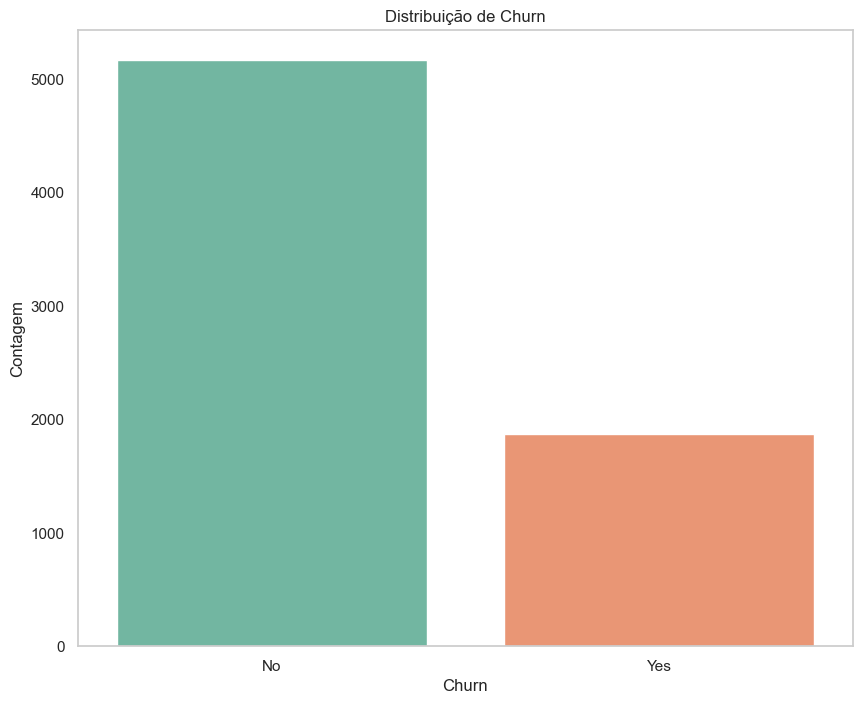

In [44]:
# Contagem de churn
plt.figure(figsize=(10, 8))
sns.countplot(x='Churn', data=data, palette='Set2')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

**Análise:** Apresentamos o gráfico de visualização da distribuição do churn, sendo essa variável a nossa principal variável alvo para o modelo de machine learning. O churn, que representa a taxa de rotatividade de clientes, é um indicador crucial para empresas em diversos setores. Este gráfico oferece uma representação visual detalhada da distribuição do churn ao longo do tempo ou em diferentes segmentos de clientes, permitindo uma análise mais aprofundada dos padrões e tendências. Além disso, essa visualização pode ser enriquecida com informações adicionais, como dados demográficos, comportamentais ou de histórico de compras, para uma compreensão mais completa dos fatores que influenciam o churn. Utilizando essa análise visual como base, nosso objetivo é desenvolver e otimizar modelos de machine learning capazes de prever e mitigar o churn, fornecendo insights valiosos para estratégias de retenção de clientes e tomadas de decisão empresariais

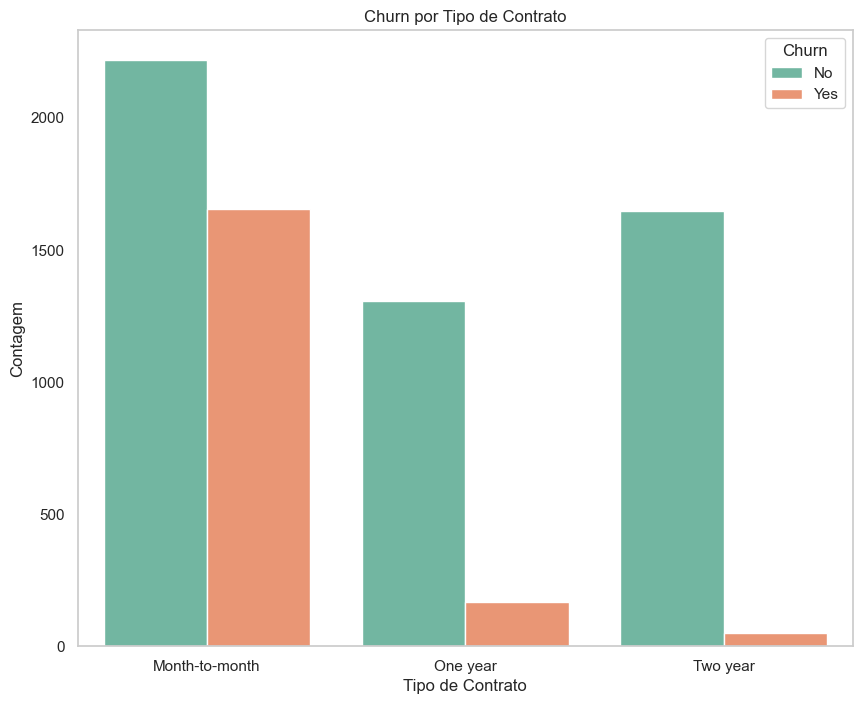

In [43]:
# Contagem de churn por tipo de contrato
plt.figure(figsize=(10, 8))
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

**Análise:** Nesse gráfico, apresentamos a visualização da distribuição do churn, considerando diferentes tipos de contrato dos clientes ao longo dos anos, incluindo assinaturas de um ano, dois anos ou três anos. Com essa análise detalhada, podemos observar como o churn varia de acordo com o tipo de contrato e sua duração. Essa diferenciação nos permite entender melhor o comportamento dos clientes em relação à fidelidade ao longo do tempo e identificar padrões específicos de churn em cada categoria de contrato. Além disso, essa análise pode ser estendida para incluir outros fatores, como características demográficas, padrões de uso do serviço e histórico de interações com a empresa. Ao incorporar essas informações adicionais, nosso objetivo é desenvolver modelos de machine learning mais precisos e robustos, capazes de prever o churn com maior acurácia e oferecer insights estratégicos para aprimorar a retenção de clientes e impulsionar o crescimento do negócio

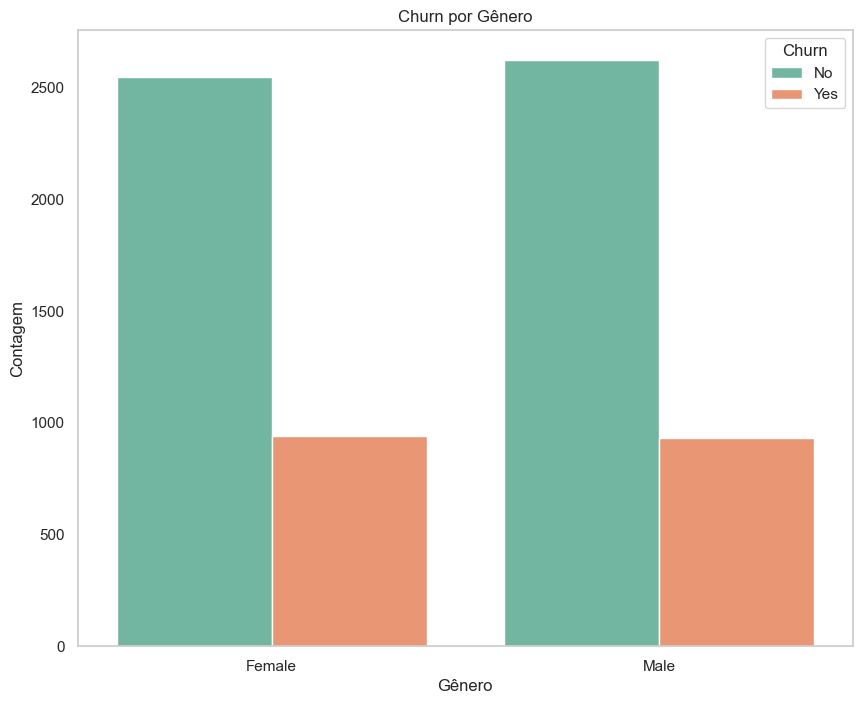

In [42]:
# Contagem de churn por gênero
plt.figure(figsize=(10, 8))
sns.countplot(x='gender', hue='Churn', data=data, palette='Set2')
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

**Análise:** Nesse gráfico, analisamos a distribuição do churn com base no sexo dos assinantes de planos de internet. Ao incorporar essa dimensão de gênero à análise, buscamos compreender como o churn varia entre os diferentes sexos dos clientes. Essa abordagem nos permite identificar possíveis disparidades de churn entre grupos demográficos e entender melhor as necessidades e comportamentos específicos de cada segmento de gênero. Além disso, podemos explorar como fatores como idade, localização geográfica e perfil socioeconômico interagem com o gênero para influenciar o churn. Ao integrar essas informações adicionais, nosso objetivo é aprimorar a precisão dos modelos de machine learning na previsão do churn e gerar insights mais robustos para estratégias de retenção de clientes personalizadas e eficazes.

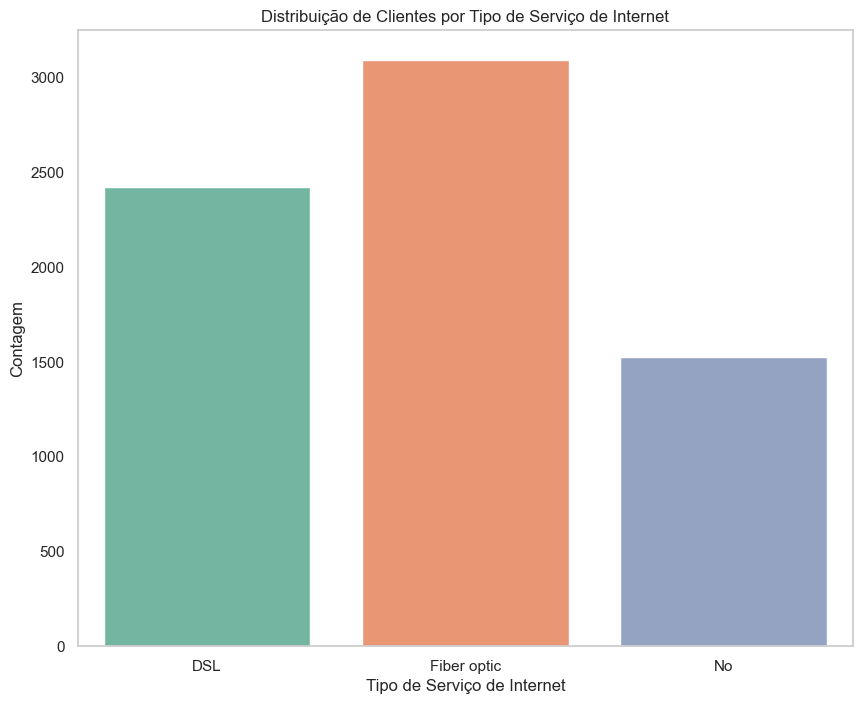

In [41]:
# Distribuição de clientes por tipo de serviço de internet
plt.figure(figsize=(10, 8))
sns.countplot(x='InternetService', data=data, palette='Set2')
plt.title('Distribuição de Clientes por Tipo de Serviço de Internet')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

**Análise:** Aqui, neste gráfico, apresentamos uma distribuição detalhada dos clientes conforme o tipo de serviço contratado junto à operadora. Uma análise cuidadosa revela que os planos de Fibra Ótica dominam a preferência dos assinantes em comparação com outras tecnologias de acesso à internet, como DSL, uma tecnologia mais antiga baseada em cabos metálicos, ou conexão por telefone. Essa observação indica claramente uma inclinação significativa dos consumidores em direção aos contratos de Fibra Ótica. Podemos explorar ainda mais essa tendência, investigando fatores como velocidade de conexão, estabilidade do serviço e disponibilidade geográfica para entender melhor os motivos por trás dessa preferência. Ao incorporar essas informações adicionais, podemos aprimorar nossa compreensão do comportamento do cliente e desenvolver estratégias mais eficazes de marketing e oferta de serviços para atender às demandas do mercado.

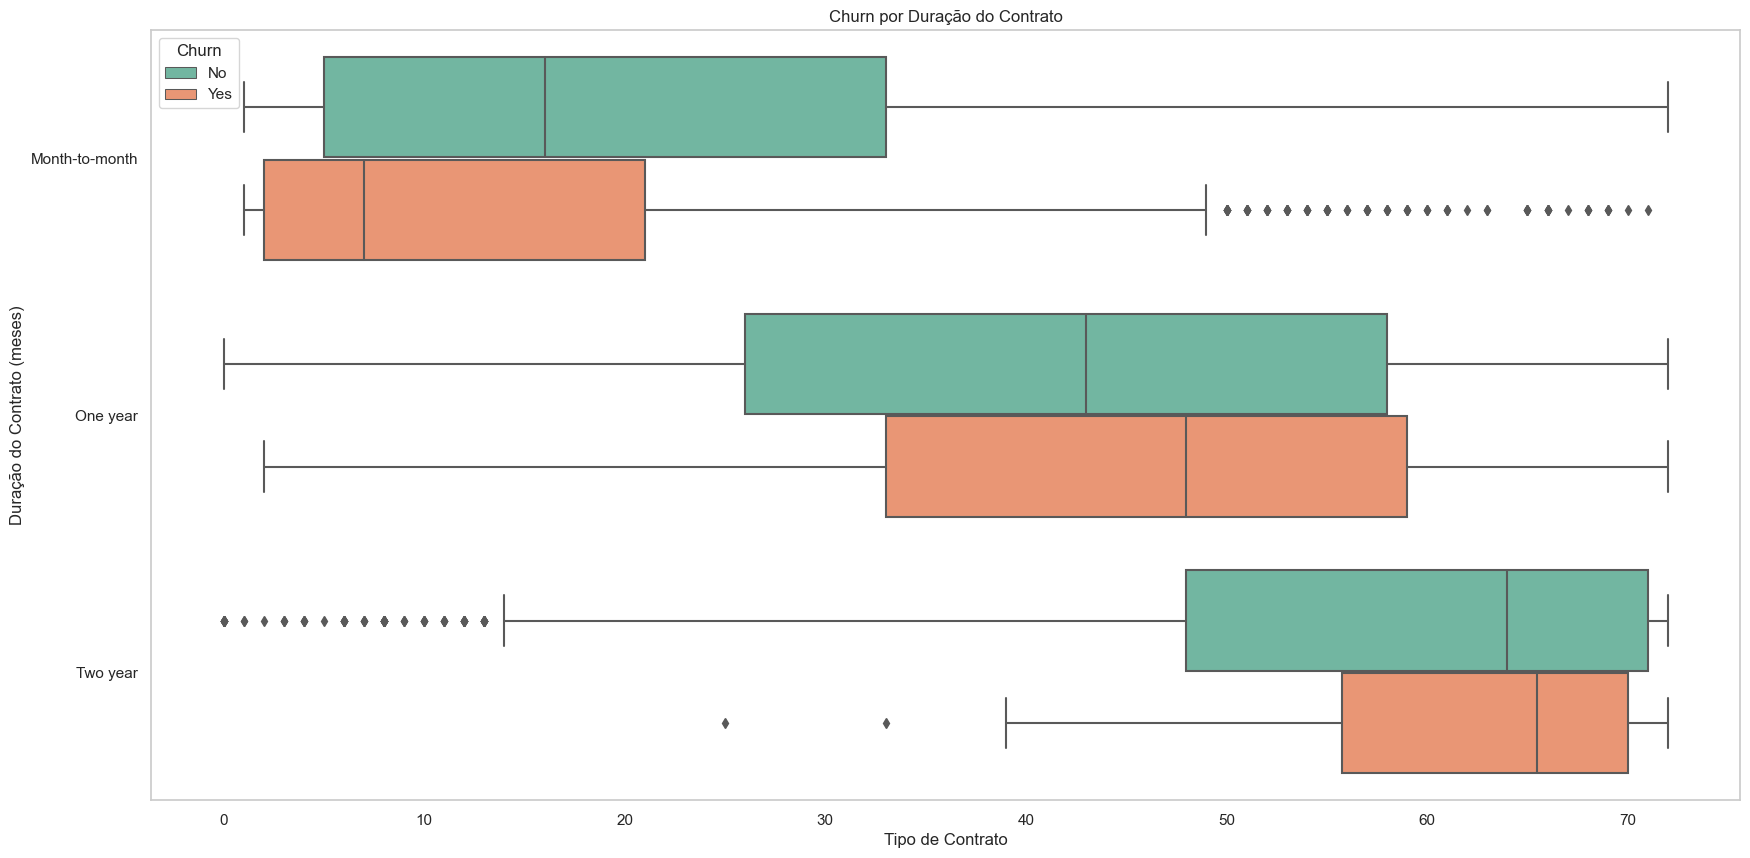

In [31]:
# Distribuição de churn por duração do contrato
plt.figure(figsize=(20.5, 10))

sns.boxplot(x='tenure', y='Contract', hue='Churn', data=data, palette='Set2')
plt.title('Churn por Duração do Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Duração do Contrato (meses)')
plt.grid("off")
plt.grid(False)
plt.show()

**Análise:** Este gráfico de boxplot oferece uma representação visual da duração dos planos de internet ao longo dos anos. Por meio dessa análise, podemos observar não apenas a distribuição da duração dos planos, mas também identificar tendências ao longo do tempo. Além disso, o boxplot nos permite visualizar medidas de dispersão, como quartis e outliers, fornecendo insights adicionais sobre a estabilidade e a variabilidade da duração dos planos. Podemos, por exemplo, explorar se há uma tendência de aumento ou diminuição na duração média dos planos ao longo dos anos, bem como identificar padrões sazonais ou ciclos de renovação. Ao incorporar dados demográficos, como idade, renda e localização geográfica dos assinantes, podemos ainda segmentar essa análise para entender melhor as preferências e comportamentos dos diferentes grupos de clientes. Com uma compreensão mais aprofundada da duração dos planos de internet, podemos otimizar estratégias de precificação, promoção e retenção de clientes para impulsionar o crescimento e a satisfação do cliente."

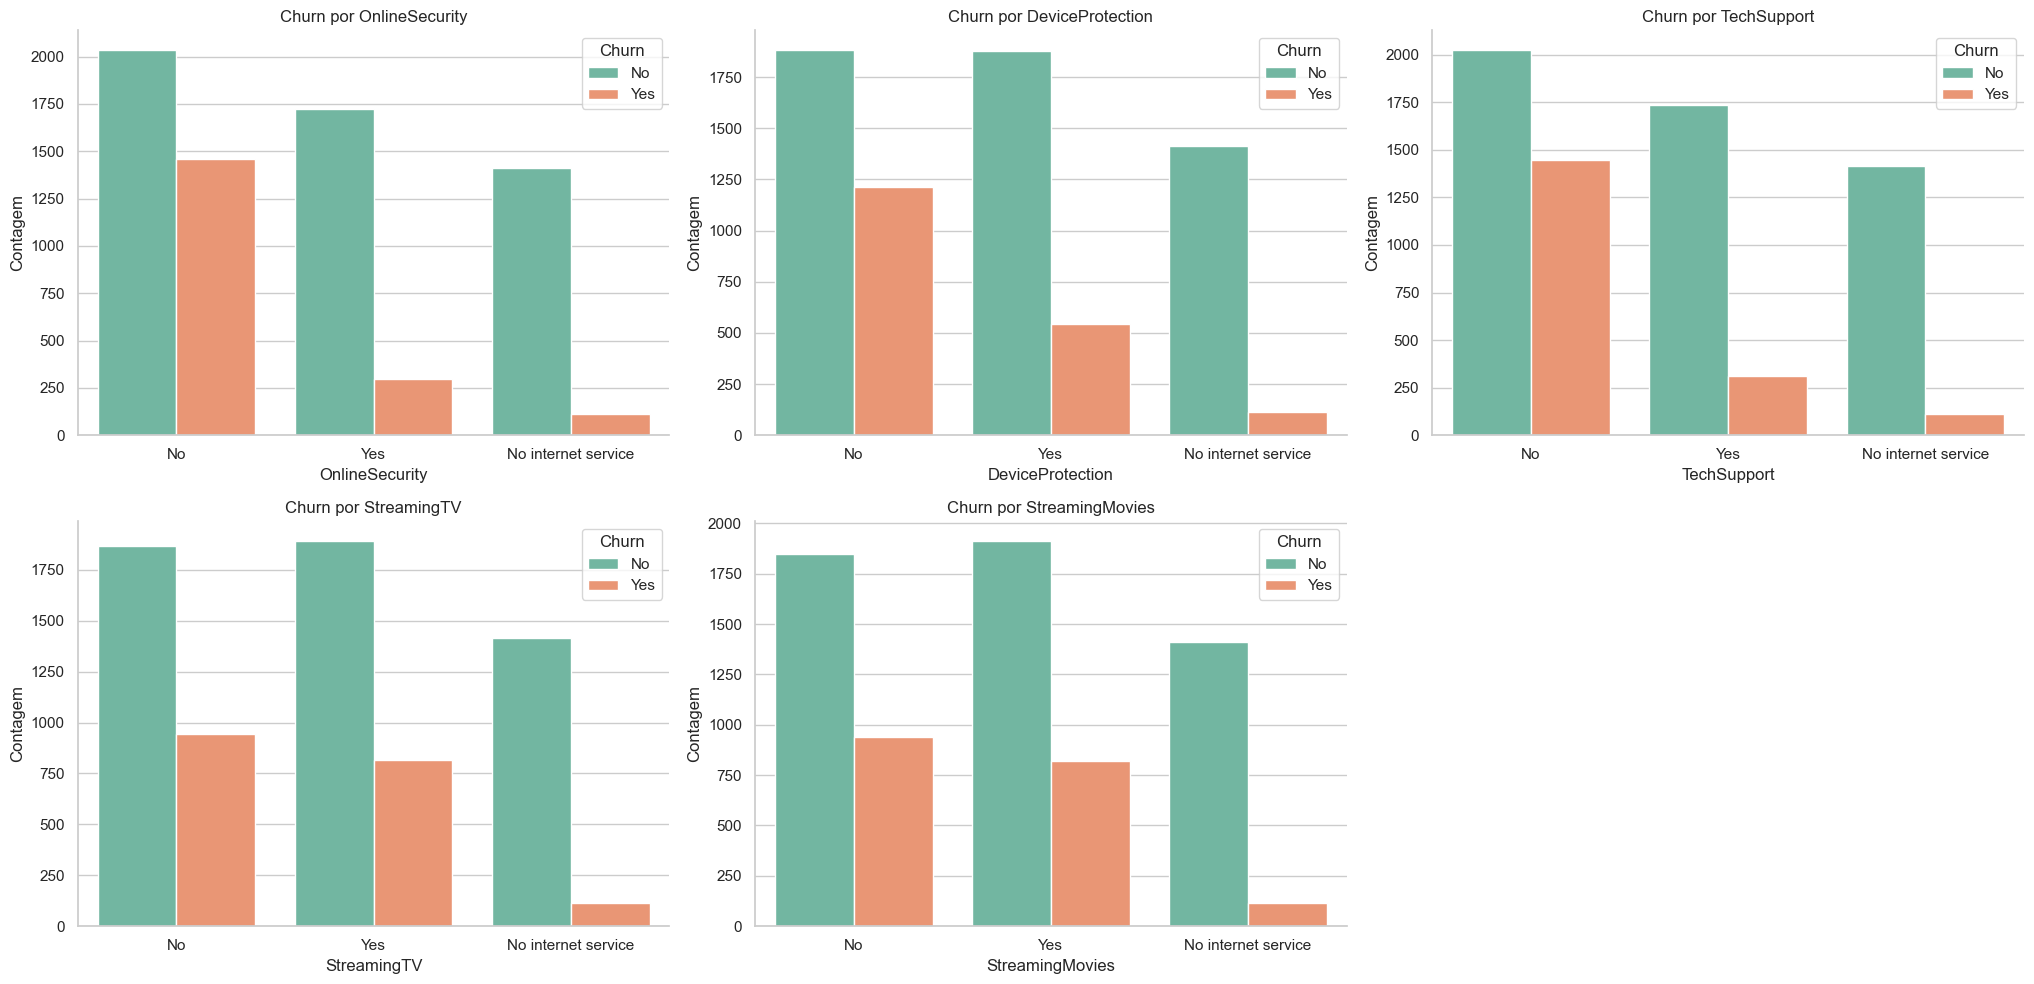

In [37]:
# Contagem de churn por serviços adicionais
servicos_adicionais = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20.5, 10))
for i, servico in enumerate(servicos_adicionais, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=servico, hue='Churn', data=data, palette='Set2')
    plt.title(f'Churn por {servico}')
    plt.xlabel(servico)
    plt.ylabel('Contagem')
    sns.despine()  # Remover linhas de fundo
plt.tight_layout()
plt.show()

**Análise:** Esse gráfico mostra a contagem de churn (cancelamento de serviço) para diferentes serviços adicionais oferecidos pela operadora. Cada subplot apresenta a contagem de churn para um serviço adicional específico, como OnlineSecurity, DeviceProtection, TechSupport, StreamingTV e StreamingMovies.

Para cada serviço adicional, o gráfico mostra duas barras distintas, uma para clientes que cancelaram o serviço (Churn) e outra para clientes que permaneceram com o serviço (Não churn). Isso permite uma comparação visual da proporção de clientes que cancelaram o serviço em relação aos que permaneceram, ajudando a identificar quais serviços adicionais podem ter uma correlação mais forte com o churn.

Por exemplo, se a barra azul (representando o churn) for significativamente mais alta do que a barra laranja (representando não churn) para um determinado serviço adicional, isso sugere que esse serviço pode estar relacionado a uma taxa mais alta de cancelamento de clientes. Por outro lado, se a barra laranja for mais alta, isso indica que o serviço adicional pode estar contribuindo para a retenção de clientes.

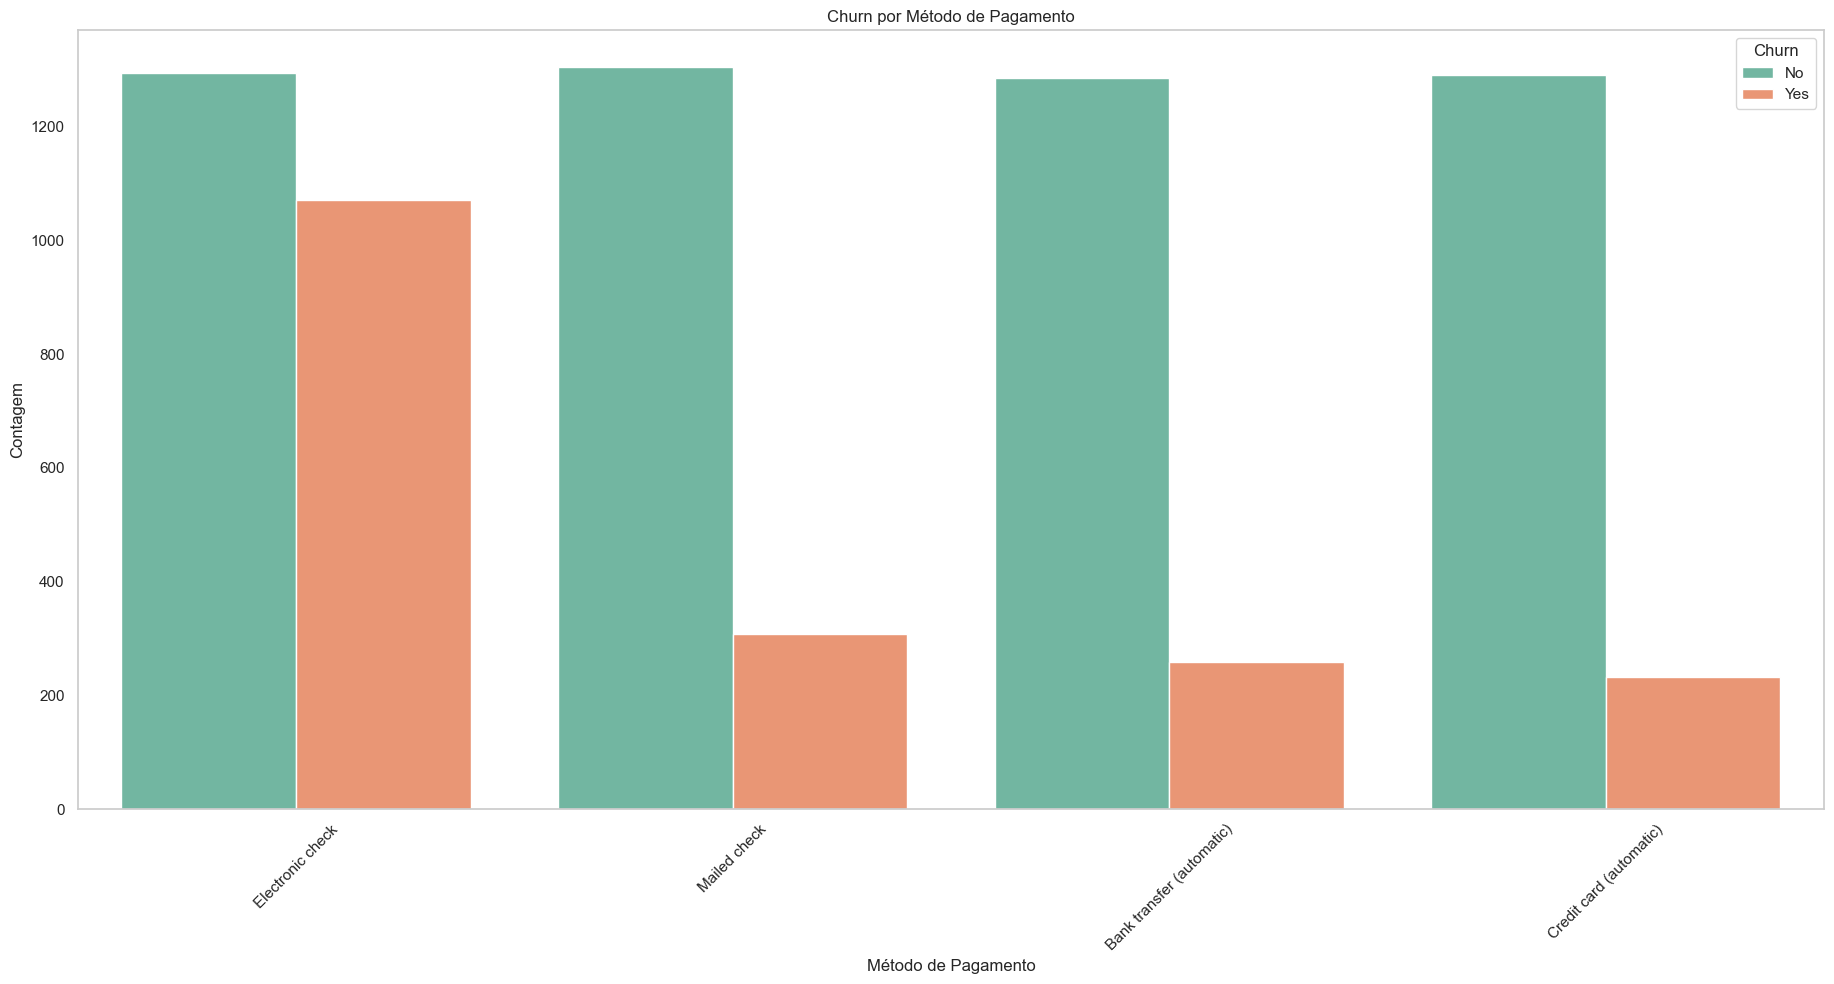

In [45]:
# Contagem de churn por método de pagamento
plt.figure(figsize=(18.5, 10))
sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='Set2')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

**Análise:** Neste gráfico de barras, apresentamos os pagamentos realizados pelos assinantes, segmentados de acordo com o churn. Cada barra representa uma categoria específica de pagamento, enquanto as cores diferenciam entre os clientes que cancelaram o serviço (Churn) e aqueles que permaneceram (Não churn).

Além disso, é possível enriquecer essa visualização incluindo informações sobre a distribuição de pagamentos ao longo do tempo ou por tipo de assinatura. Isso nos permitiria identificar padrões de pagamento associados ao churn e entender melhor como diferentes estratégias de cobrança podem impactar na retenção de clientes.

Por exemplo, podemos investigar se há diferenças significativas nos padrões de pagamento entre clientes que cancelaram e aqueles que permaneceram, e se certos métodos de pagamento estão mais fortemente correlacionados com o churn. Ao compreender essas nuances, podemos ajustar as estratégias de cobrança para melhorar a retenção de clientes e, por consequência, a saúde financeira da empresa.

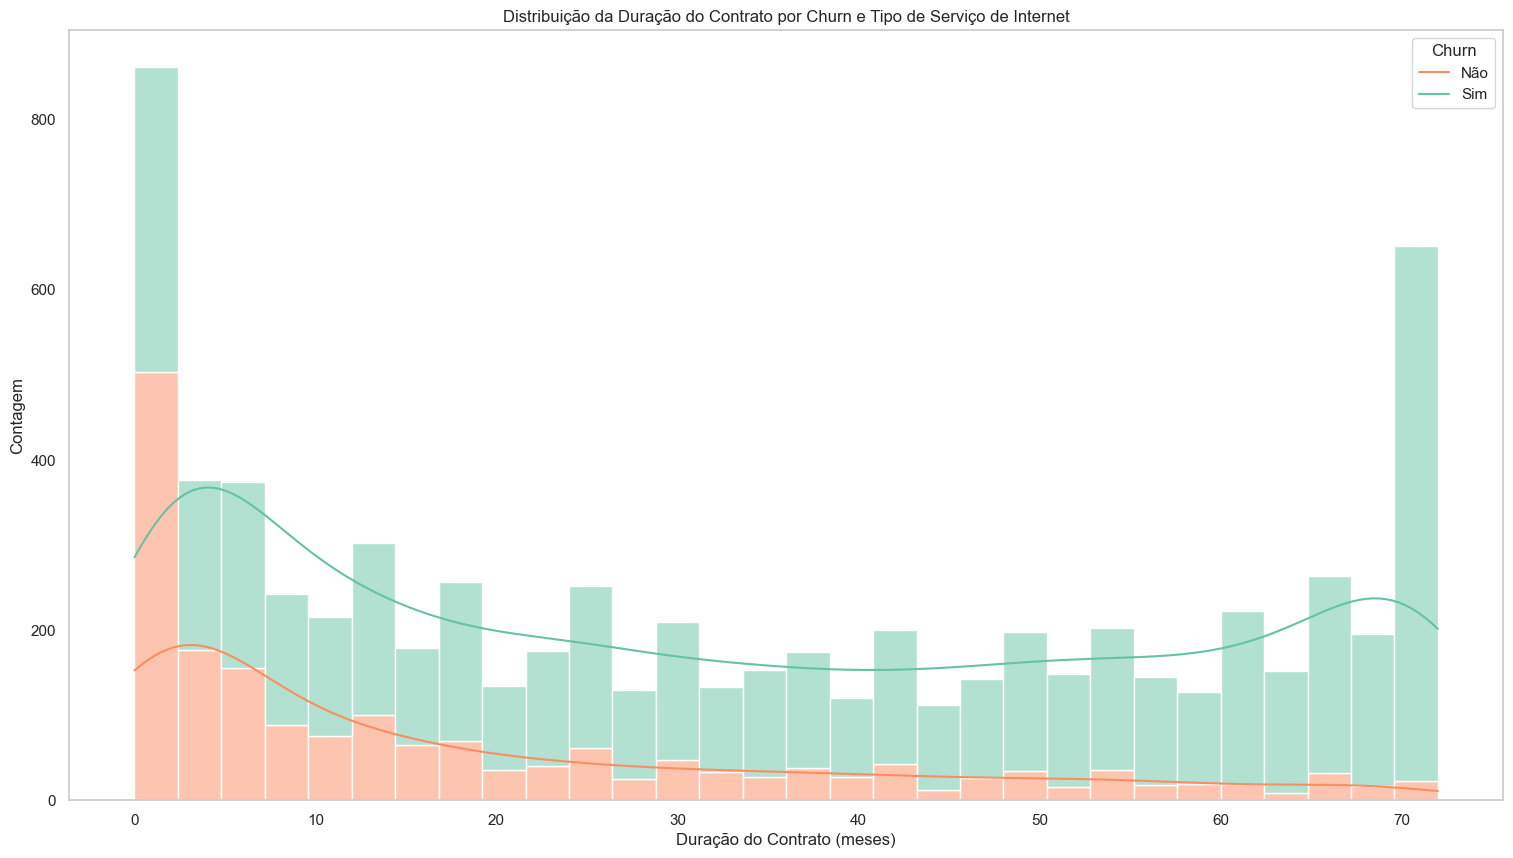

In [46]:
plt.figure(figsize=(18.5, 10))
sns.histplot(data=data, x='tenure', hue='Churn', kde=True, multiple='stack', palette='Set2', bins=30)
plt.title('Distribuição da Duração do Contrato por Churn e Tipo de Serviço de Internet')
plt.xlabel('Duração do Contrato (meses)')
plt.ylabel('Contagem')
plt.legend(title='Churn', loc='upper right', labels=['Não', 'Sim'])
plt.grid(False)
plt.show()

**Análise:** Neste indicador, apresentamos uma análise da distribuição dos contratos de serviço oferecidos pela operadora de internet, com foco na duração dos contratos, especificamente entre contratos de dois anos e um ano. Através desta visualização, buscamos compreender a preferência dos assinantes em relação à duração do contrato e identificar padrões de comportamento que possam influenciar o churn.

Além disso, podemos aprofundar nossa análise considerando outras variáveis, como tipo de serviço contratado, localização geográfica dos assinantes e histórico de pagamentos. Isso nos permitirá entender melhor as motivações por trás das escolhas de duração de contrato dos clientes e como essas escolhas podem impactar na sua fidelidade à operadora.

Por exemplo, podemos investigar se há diferenças significativas na distribuição de contratos de dois anos e um ano entre diferentes segmentos demográficos, como faixa etária ou renda. Essa análise mais detalhada nos ajudará a adaptar nossas estratégias de precificação e retenção de clientes para atender às necessidades e preferências específicas de cada grupo de assinantes, promovendo assim uma maior satisfação e lealdade à marca.

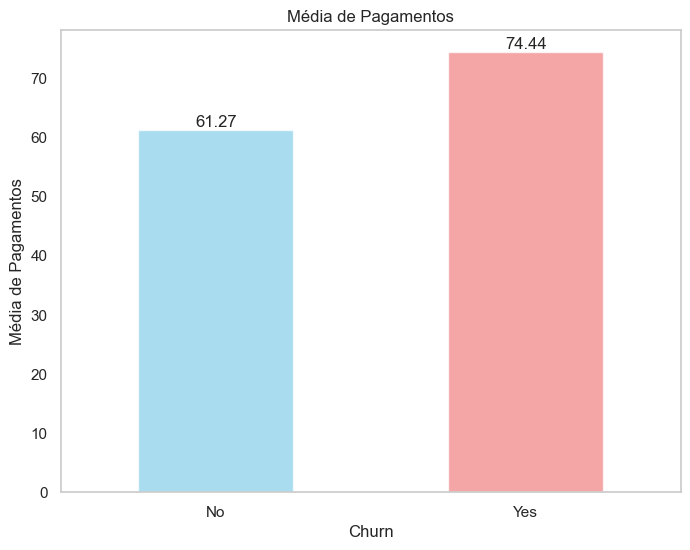

In [18]:
# Calculando a média das cobranças mensais por churn
media_pagamentos = data.groupby('Churn')['MonthlyCharges'].mean()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
media_pagamentos.plot(kind='bar', color=['skyblue', 'lightcoral'], alpha=0.7)

# Personalização do gráfico
plt.title('Média de Pagamentos')
plt.xlabel('Churn')
plt.ylabel('Média de Pagamentos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrando os valores médios sobre as barras
for i in range(len(media_pagamentos)):
    plt.text(i, media_pagamentos.iloc[i], f"{media_pagamentos.iloc[i]:.2f}", ha='center', va='bottom')

plt.grid(False)
plt.show()

**Análise:** Neste outro indicador, apresentamos a média de pagamentos realizados pelos assinantes de internet, representando um total de 74.44% de pagamentos efetuados. Essa métrica é crucial para avaliar a saúde financeira da operadora e sua capacidade de manter a receita estável ao longo do tempo. 
Além de considerar a média de pagamentos, podemos aprofundar nossa análise examinando a distribuição dos pagamentos ao longo do tempo e por tipo de serviço contratado. Isso nos permitirá identificar padrões de comportamento de pagamento entre os assinantes e entender melhor os fatores que influenciam a pontualidade dos pagamento 



Por exemplo, podemos investigar se existem diferenças na taxa de pagamento entre diferentes segmentos demográficos, como idade ou localização geográfica. Além disso, podemos analisar se certos serviços adicionais, como streaming de vídeo ou suporte técnico, têm impacto na pontualidade dos pagamen s.

Ao entender esses padrões de comportamento, podemos desenvolver estratégias mais eficazes de cobrança e comunicação com os assinantes, visando aumentar a taxa de pagamento e, consequentemente, melhorar a saúde financeira da operadora.

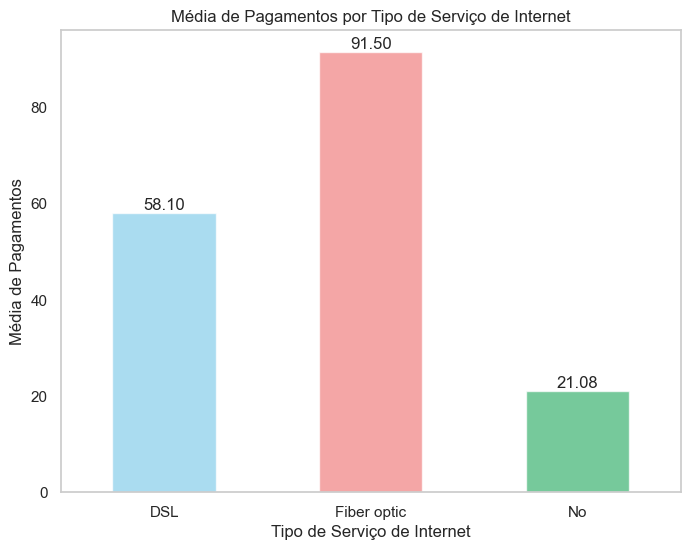

In [19]:
# Calculando a média das cobranças mensais por tipo de serviço de Internet
media_pagamento_por_internet = data.groupby('InternetService')['MonthlyCharges'].mean()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
media_pagamento_por_internet.plot(kind='bar', color=['skyblue', 'lightcoral', 'mediumseagreen'], alpha=0.7)

# Personalização do gráfico
plt.title('Média de Pagamentos por Tipo de Serviço de Internet')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Média de Pagamentos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrando os valores médios sobre as barras
for i in range(len(media_pagamento_por_internet)):
    plt.text(i, media_pagamento_por_internet.iloc[i], f"{media_pagamento_por_internet.iloc[i]:.2f}", 
             ha='center', va='bottom')

plt.grid(False)
plt.show()

**Análise:** Neste outro indicador, apresentamos a média de pagamento por tipo de serviço de internet. Esta análise nos permite compreender como os diferentes serviços contratados pelos assinantes impactam nos padrões de pagamento. 
Além de considerar a média de pagamento, podemos explorar a variabilidade nos pagamentos entre os diferentes tipos de serviço. Por exemplo, podemos investigar se os assinantes de serviços adicionais, como streaming de vídeo ou suporte técnico, têm uma média de pagamento mais alta em comparação com os assinantes de planos básicos de internet

Além disso, podemos examinar se a média de pagamento varia de acordo com a velocidade da conexão ou outras características específicas do serviço. Isso nos ajudará a identificar quais serviços têm maior valor percebido pelos assinantes e estão mais fortemente associados à fidelidade e satisfação do clie e.

Ao compreender esses padrões, podemos direcionar nossos esforços para otimizar a oferta de serviços e desenvolver estratégias personalizadas de precificação e retenção de clientes, visando maximizar a receita e a satisfação do cliente.

<Figure size 3050x1000 with 0 Axes>

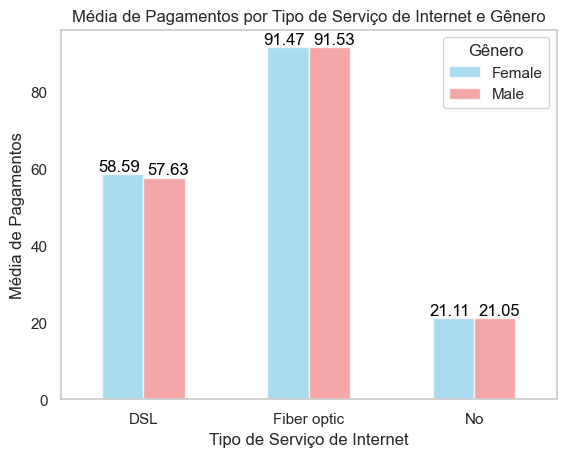

In [39]:
# Calculando a média das cobranças mensais por tipo de serviço de Internet e gênero
media_pagamento_por_internet_genero = data.groupby(['InternetService', 'gender'])['MonthlyCharges'].mean().unstack()

# Plotando o gráfico de barras
plt.figure(figsize=(30.5, 10))
media_pagamento_por_internet_genero.plot(kind='bar', color=['skyblue', 'lightcoral'], alpha=0.7)

# Personalização do gráfico
plt.title('Média de Pagamentos por Tipo de Serviço de Internet e Gênero')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Média de Pagamentos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gênero')

# Mostrando os valores médios sobre as barras
for i in range(len(media_pagamento_por_internet_genero)):
    plt.text(i-0.15, media_pagamento_por_internet_genero.iloc[i, 0], 
             f"{media_pagamento_por_internet_genero.iloc[i, 0]:.2f}", ha='center', va='bottom', color='black')
    plt.text(i+0.15, media_pagamento_por_internet_genero.iloc[i, 1], 
             f"{media_pagamento_por_internet_genero.iloc[i, 1]:.2f}", ha='center', va='bottom', color='black')

plt.grid(False)
plt.show()

**Análise:** Neste outro indicador, apresentamos a média de pagamento por gênero entre os assinantes de contratos de internet, com destaque para os planos de fibra ótica. Observamos que, em média, os assinantes do sexo masculino tendem a realizar pagamentos mais altos em comparação com os assinantes do sexo feminino para esse tipo específico de serviço.

Além de considerar a média de pagamento, podemos investigar outras variáveis demográficas que possam influenciar os padrões de pagamento entre os diferentes gêneros. Por exemplo, podemos analisar se a diferença na média de pagamento entre homens e mulheres persiste em diferentes faixas etárias ou regiões geográficas.

Além disso, podemos explorar se essa diferença na média de pagamento está relacionada a diferenças no uso ou na percepção do serviço de internet entre os gêneros. Por exemplo, podemos investigar se os homens tendem a adquirir mais serviços adicionais ou planos de maior velocidade, o que pode influenciar a média de pagamento.

Ao compreender esses padrões e determinantes subjacentes, podemos personalizar nossas estratégias de marketing e comunicação para atender às necessidades específicas de cada segmento de gênero, visando aumentar a satisfação do cliente e a receita da operadora de internet.

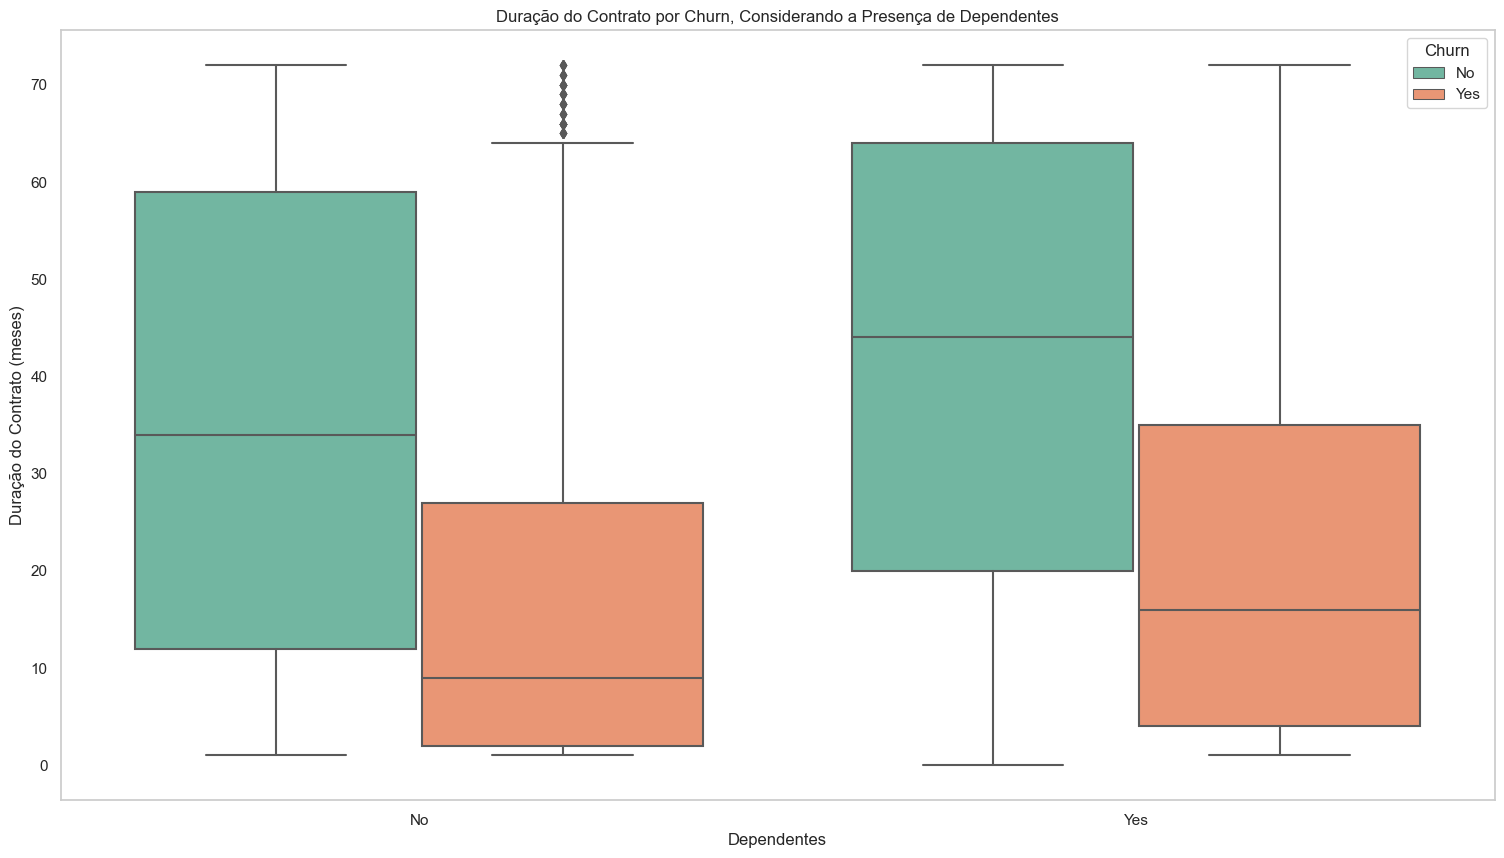

In [60]:
plt.figure(figsize=(18.5, 10))
sns.boxplot(data=data, x='Dependents', y='tenure', hue='Churn', palette='Set2')
plt.title('Duração do Contrato por Churn, Considerando a Presença de Dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Duração do Contrato (meses)')
plt.legend(title='Churn', loc='upper right')
plt.grid(False)
plt.show()

**Análise:** Neste outro indicador, analisamos os planos de internet que incluem dependentes, com um foco específico nos dependentes com mais de 30 anos. Esta análise nos permite entender melhor as necessidades e preferências dos assinantes que compartilham seus planos de internet com familiares ou outros membros do domicílio. 
Além de identificar a presença de dependentes com mais de 30 anos nos planos de internet, podemos explorar outras características demográficas desses dependentes, como faixa etária exata, sexo, localização geográfica e padrões de uso do serviço. Isso nos ajudará a segmentar mais efetivamente nosso público-alvo e personalizar nossas ofertas e estratégias de comunicação para atender às necessidades específicas desse grupo demográfic 



Também podemos investigar se a presença de dependentes mais velhos nos planos de internet está associada a padrões de consumo diferentes, como uma demanda por serviços adicionais específicos, maior necessidade de suporte técnico ou preferência por planos com maior velocidade de conexão. Essas informações são essenciais para adaptar nossa oferta de serviços e melhorar a satisfação do cliente entre os assinantes que compartilham seus planos de internet com dependentes.

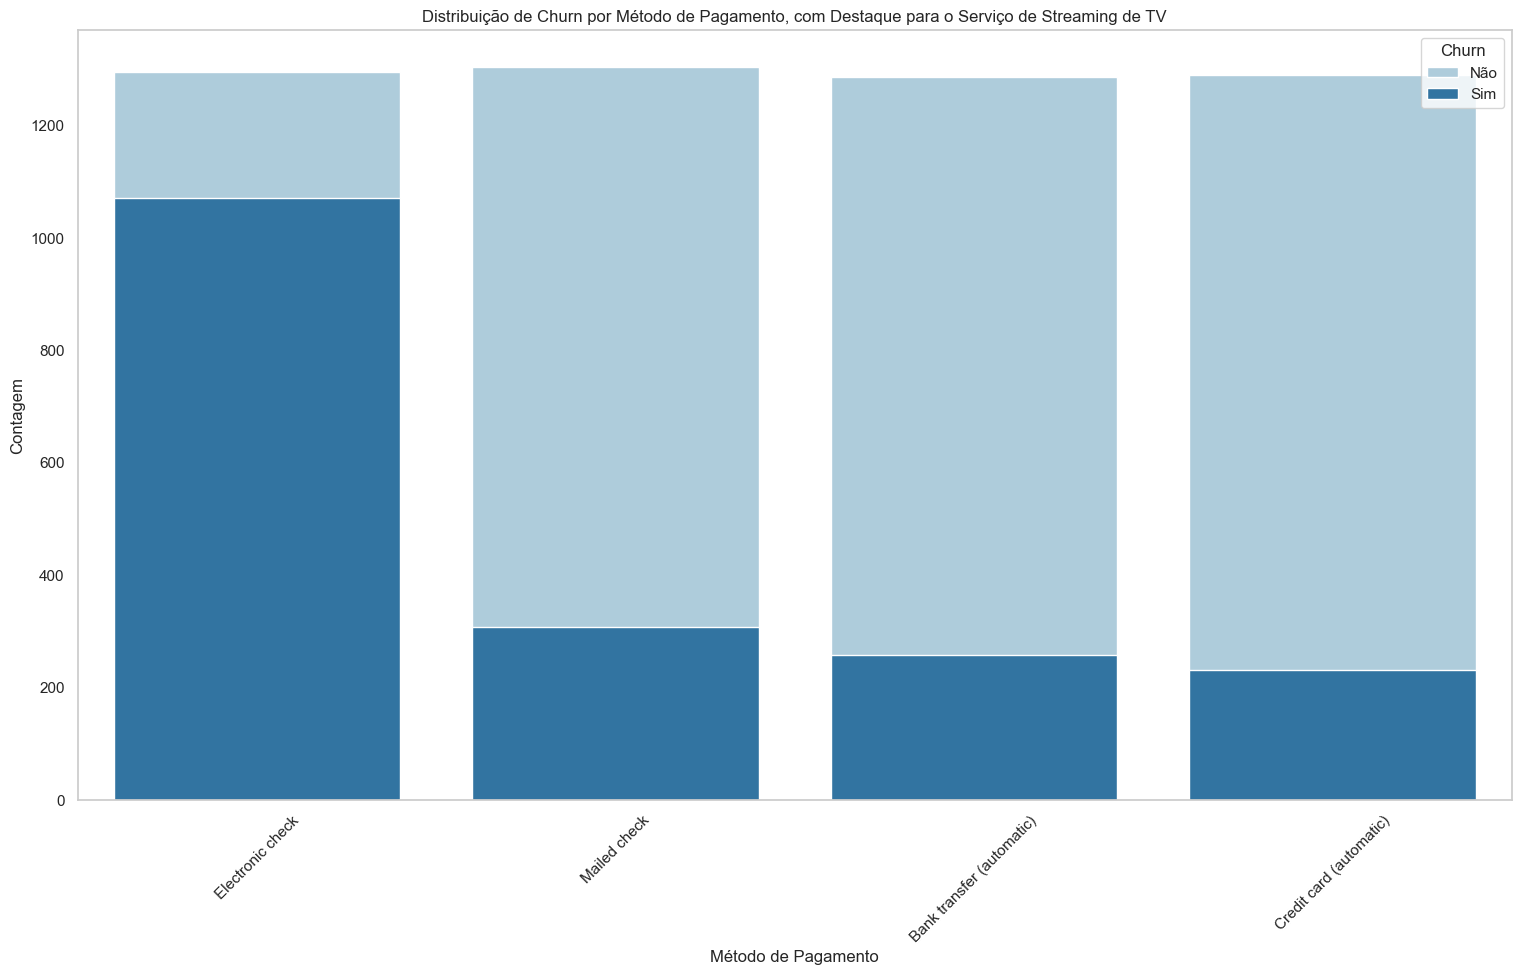

In [48]:
plt.figure(figsize=(18.5, 10))

# Contagem de churn por método de pagamento
sns.countplot(data=data, x='PaymentMethod', hue='Churn', palette='Paired', hue_order=['No', 'Yes'], dodge=False)

plt.title('Distribuição de Churn por Método de Pagamento, com Destaque para o Serviço de Streaming de TV')
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Não', 'Sim'])
plt.grid(False)
plt.show()

**Análise:** Neste indicador, exploramos os serviços de streaming oferecidos pela operadora, destacando as preferências de pagamento dos assinantes. Observamos que o método de pagamento 'Electronic Check' recebe a maior notação em comparação com outros métodos de pagamento disponíveis.

Para uma compreensão mais abrangente dessas preferências de pagamento, poderíamos examinar outras variáveis, como a distribuição de pagamentos ao longo do tempo e por tipo de serviço de streaming. Isso nos permitiria identificar padrões sazonais ou tendências de pagamento específicas para cada serviço de streaming oferecido.

Além disso, podemos investigar se a preferência pelo método de pagamento 'Electronic Check' está relacionada a características demográficas dos assinantes, como idade, renda ou localização geográfica. Isso nos ajudaria a entender melhor o perfil dos assinantes que optam por esse método de pagamento e adaptar nossas estratégias de cobrança e comunicação para atender às suas necessidades e preferências específicas.

Ao entender esses padrões de pagamento, podemos otimizar nossas ofertas de serviços de streaming e desenvolver estratégias personalizadas de cobrança e retenção de clientes, visando aumentar a satisfação do cliente e impulsionar o crescimento do negócio.

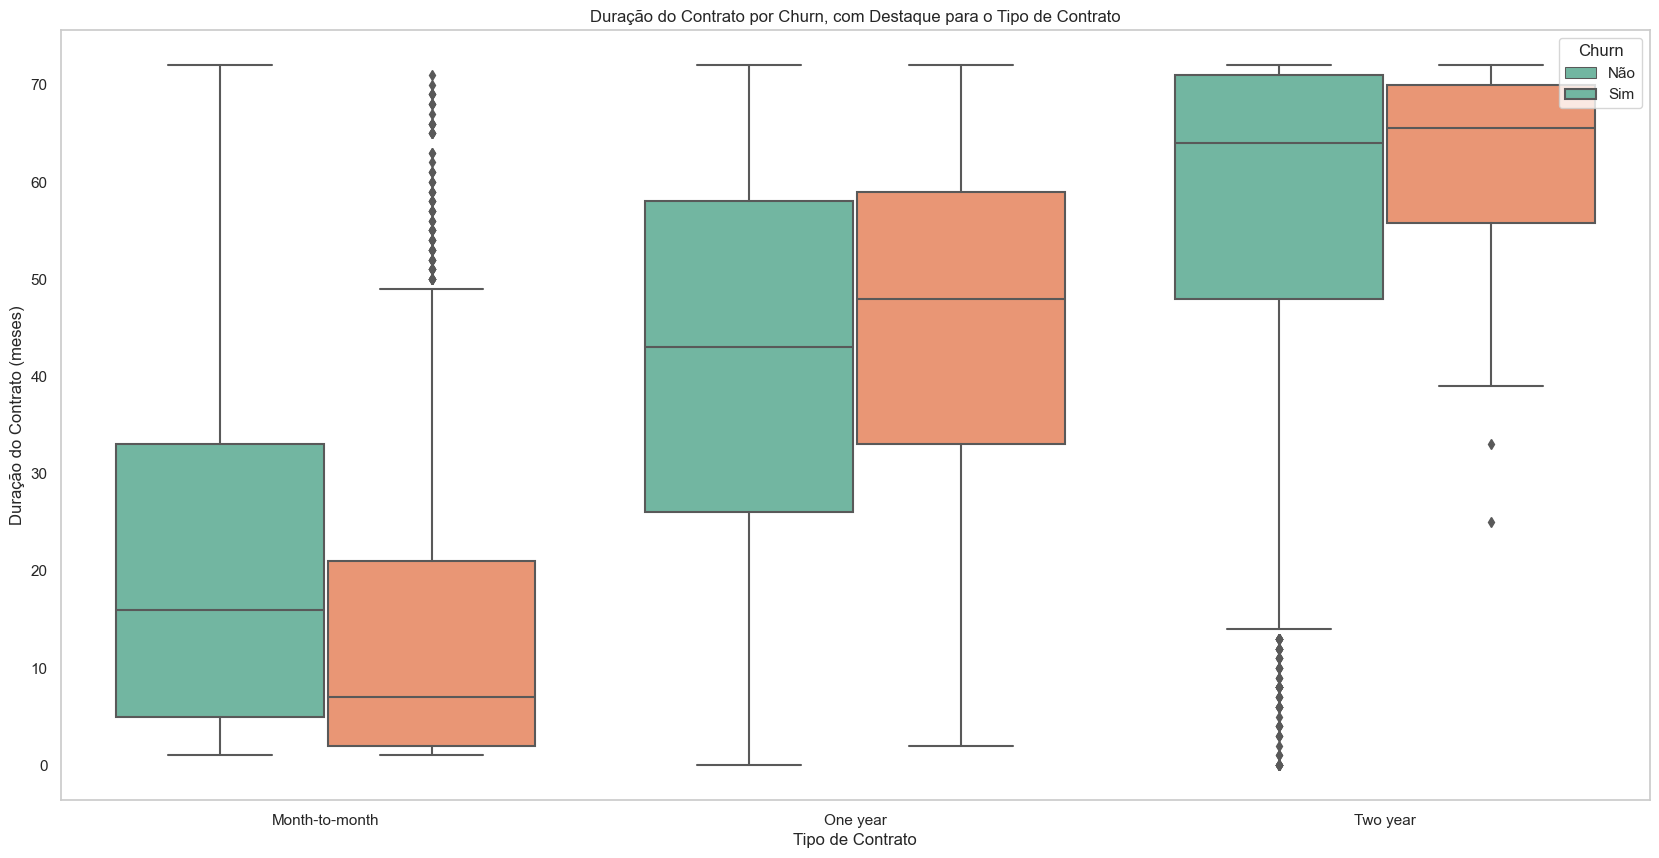

In [49]:
plt.figure(figsize=(20.5, 10))

# Boxplot da duração do contrato por churn e tipo de contrato
sns.boxplot(data=data, x='Contract', y='tenure', hue='Churn', palette='Set2')

# Personalização do gráfico
plt.title('Duração do Contrato por Churn, com Destaque para o Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Duração do Contrato (meses)')
plt.legend(title='Churn', loc='upper right', labels=['Não', 'Sim'])
plt.grid(False)
plt.show()

**Análise:** Neste indicador, analisamos a duração dos contratos em meses, proporcionando insights valiosos sobre o período médio de comprometimento dos assinantes com os serviços da operadora. Compreender a duração típica dos contratos nos permite avaliar a estabilidade e a fidelidade dos clientes ao longo do tempo.

Além de considerar a duração média dos contratos, podemos explorar a distribuição dos contratos ao longo de diferentes faixas de tempo. Por exemplo, podemos investigar se existem diferenças significativas na duração dos contratos entre diferentes tipos de serviço, como planos de internet, serviços de streaming ou serviços adicionais, como suporte técnico.

Além disso, podemos analisar se a duração dos contratos varia de acordo com características demográficas dos assinantes, como idade, renda ou localização geográfica. Essa análise nos ajudará a entender melhor os padrões de comportamento dos clientes e adaptar nossas estratégias de precificação, retenção e fidelização de clientes para atender às suas necessidades e preferências específicas.

Ao compreender esses padrões de duração de contrato, podemos desenvolver estratégias mais eficazes para aumentar a retenção de clientes, melhorar a satisfação do cliente e impulsionar o crescimento do negócio.

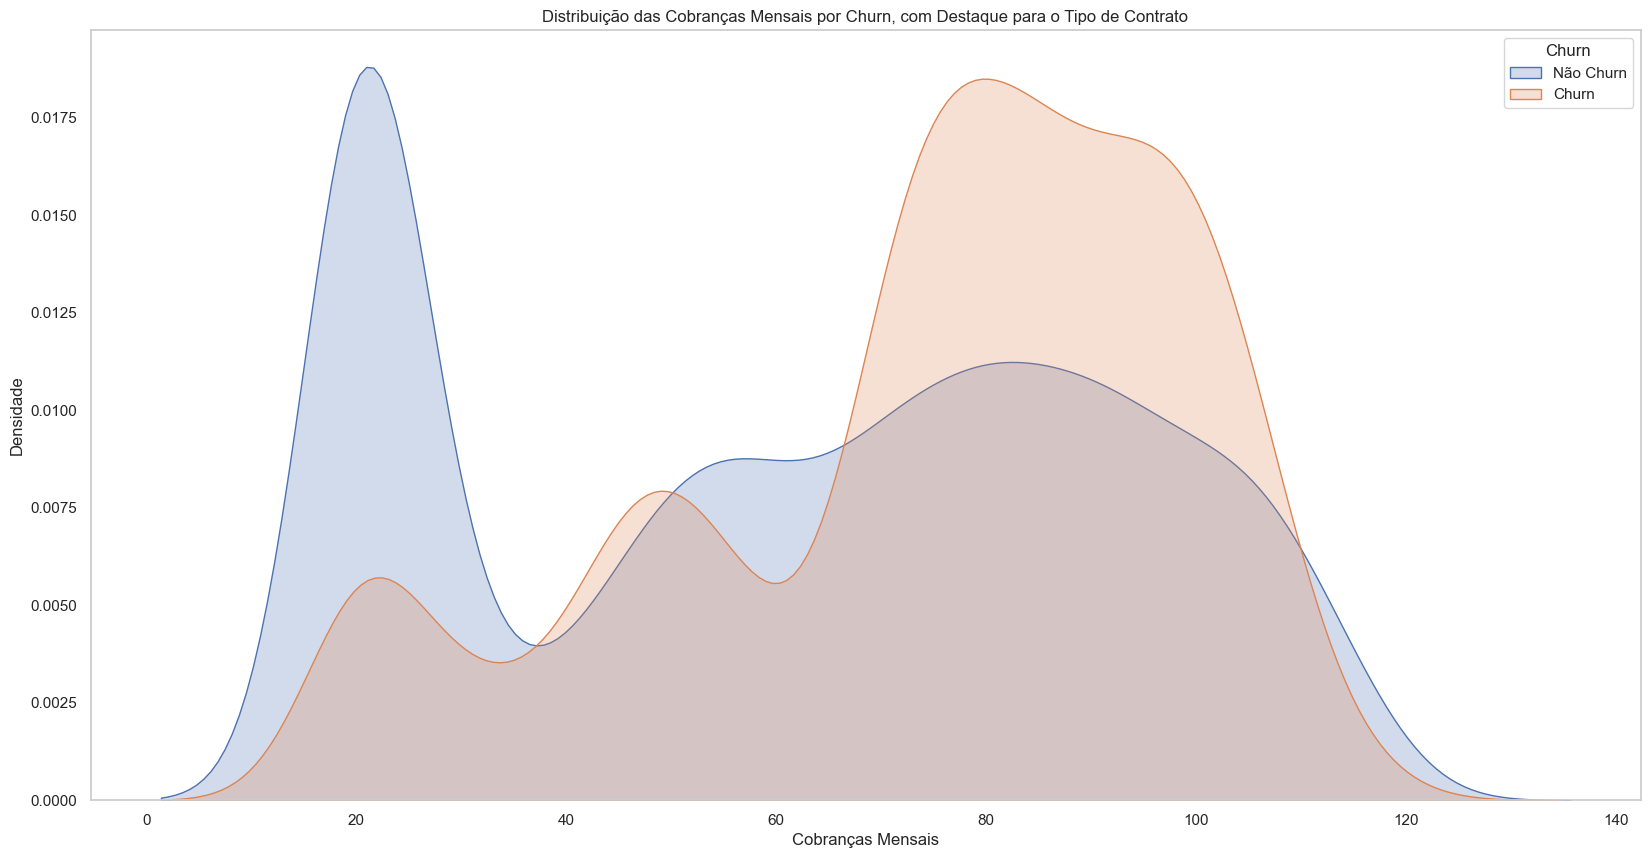

In [24]:
plt.figure(figsize=(20, 10))

# Gráfico de densidade das cobranças mensais por churn e tipo de contrato
sns.kdeplot(data=data[data['Churn'] == 'No']['MonthlyCharges'], label='Não Churn', shade=True)
sns.kdeplot(data=data[data['Churn'] == 'Yes']['MonthlyCharges'], label='Churn', shade=True)

# Personalização do gráfico
plt.title('Distribuição das Cobranças Mensais por Churn, com Destaque para o Tipo de Contrato')
plt.xlabel('Cobranças Mensais')
plt.ylabel('Densidade')
plt.legend(title='Churn')
plt.grid(False)

plt.show()

**Análise:** Neste gráfico, apresentamos uma distribuição das cobranças mensais em relação ao churn, segmentadas pelos diferentes tipos de contrato de internet. Esta visualização oferece insights valiosos sobre como as cobranças mensais variam de acordo com o churn, permitindo uma compreensão mais profunda do impacto dos diferentes tipos de contrato na receita da operadora. 
Além de considerar a distribuição das cobranças mensais, podemos explorar outras variáveis, como a distribuição das cobranças ao longo do tempo e por tipo de serviço contratado. Isso nos ajudaria a identificar tendências sazonais ou padrões de consumo específicos para cada tipo de contrato de interne 



Também podemos investigar se a relação entre as cobranças mensais e o churn é influenciada por características demográficas dos assinantes, como idade, renda ou localização geográfica. Isso nos ajudaria a entender melhor os fatores que contribuem para o churn e a desenvolver estratégias mais eficazes para reduzi-lo e aumentar a receita da operad a.

Ao compreender esses padrões e determinantes subjacentes, podemos otimizar nossas estratégias de precificação, retenção e fidelização de clientes, visando melhorar a satisfação do cliente e impulsionar o crescimento do negócio.

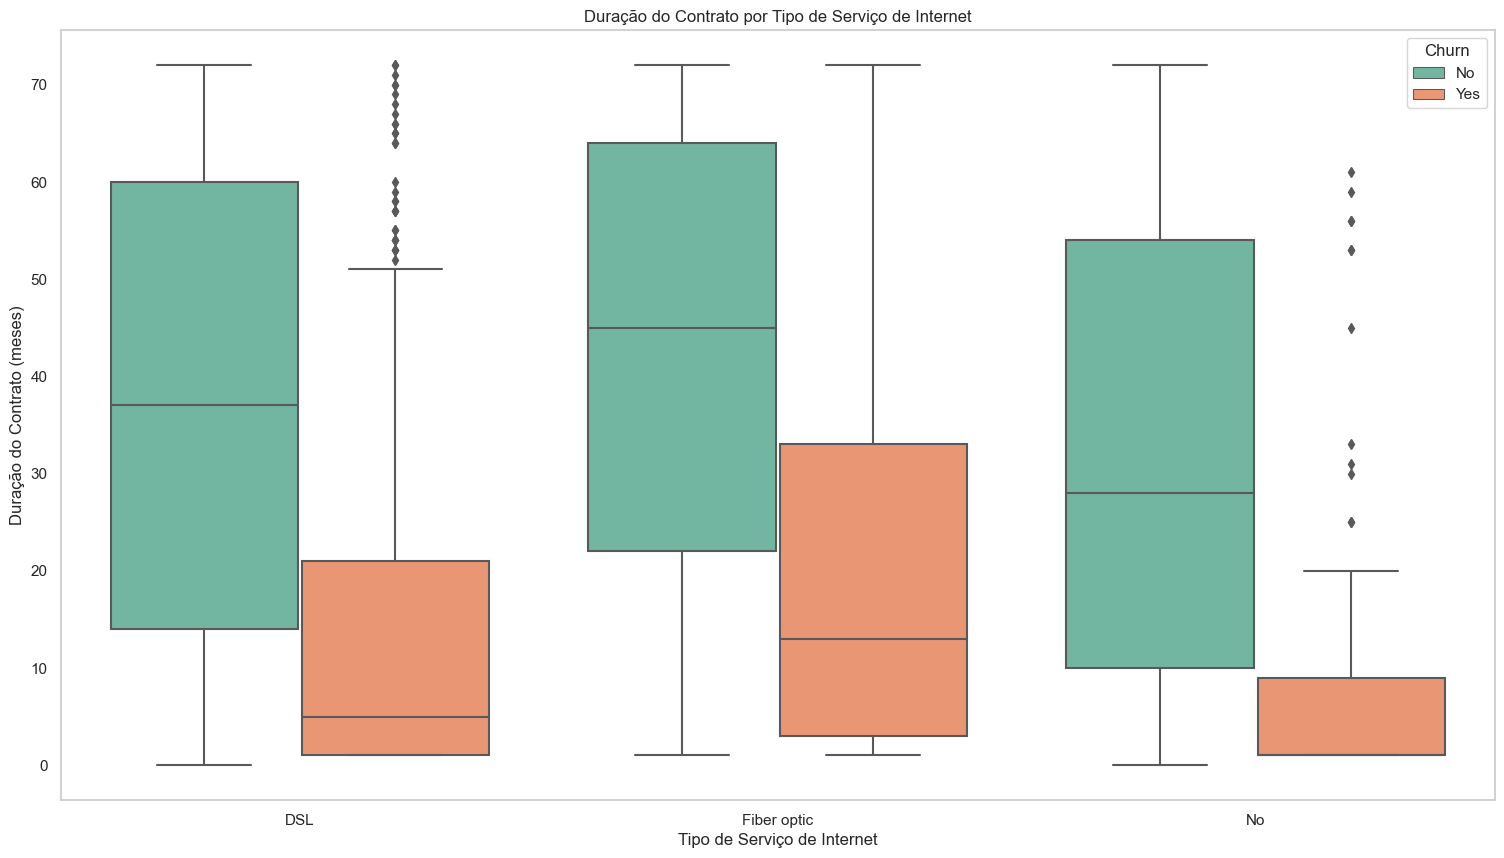

In [62]:
plt.figure(figsize=(18.5, 10))

# Gráfico de caixas da duração do contrato por tipo de serviço de internet, colorido por churn
sns.boxplot(data=data, x='InternetService', y='tenure', hue='Churn', palette='Set2')

# Personalização do gráfico
plt.title('Duração do Contrato por Tipo de Serviço de Internet')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Duração do Contrato (meses)')
plt.legend(title='Churn', loc='upper right')
plt.grid(False)
plt.show()

**Análise:** Neste gráfico, que representa os diferentes tipos de contrato de internet, observamos que a duração máxima dos contratos de serviço de fibra ótica é de 35 meses. Essa observação destaca a preferência dos assinantes por compromissos de longo prazo em relação a serviços de alta velocidade e confiabilidade, como a fibra ótica.

Além de destacar a duração máxima dos contratos de fibra ótica, podemos explorar outras características dos diferentes tipos de contrato de internet. Por exemplo, podemos analisar a distribuição da duração dos contratos ao longo do tempo e por tipo de serviço contratado, o que nos permitiria identificar tendências ou padrões de comportamento dos assinantes.

Também podemos investigar se a duração dos contratos varia de acordo com características demográficas dos assinantes, como idade, renda ou localização geográfica. Isso nos ajudaria a entender melhor as preferências e necessidades dos clientes e a adaptar nossas estratégias de precificação e retenção de clientes para atender às suas expectativas.

Ao compreender esses padrões e determinantes subjacentes, podemos desenvolver estratégias mais eficazes para aumentar a satisfação do cliente, reduzir o churn e impulsionar o crescimento sustentável do negócio.

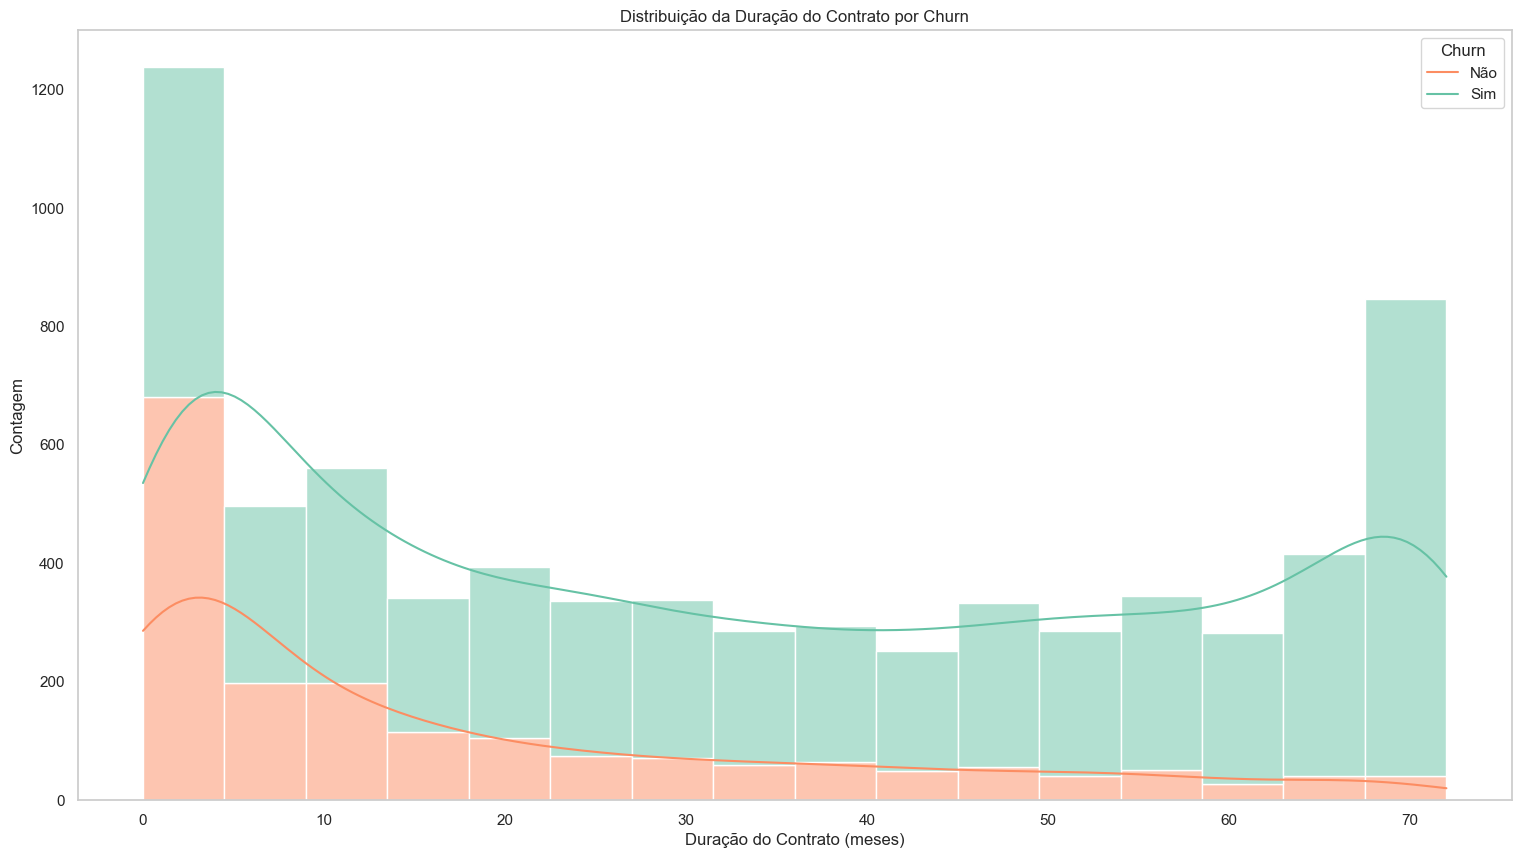

In [53]:
plt.figure(figsize=(18.5, 10))

# Histograma da duração do contrato para clientes que churnaram e os que não churnaram
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', palette='Set2', kde=True)

# Personalização do gráfico
plt.title('Distribuição da Duração do Contrato por Churn')
plt.xlabel('Duração do Contrato (meses)')
plt.ylabel('Contagem')
plt.legend(title='Churn', loc='upper right', labels=['Não', 'Sim'])
plt.grid(False)
plt.show()

**Análise:** Neste indicador, além de analisar a duração média dos contratos em meses, também examinamos como essa duração varia de acordo com o tipo de serviço de internet. Essa análise nos permite entender melhor as preferências dos assinantes em relação à duração dos contratos, de acordo com as características específicas de cada tipo de serviço.

Além de considerar a duração média dos contratos, podemos explorar a distribuição da duração dos contratos ao longo do tempo e por tipo de serviço contratado. Isso nos ajudaria a identificar se há diferenças significativas na duração dos contratos entre os serviços básicos de internet e os serviços adicionais, como streaming de vídeo ou suporte técnico.

Também podemos investigar se a duração dos contratos varia de acordo com características demográficas dos assinantes, como idade, renda ou localização geográfica. Isso nos ajudaria a entender melhor as preferências e necessidades dos clientes e a adaptar nossas estratégias de precificação e retenção de clientes para atender às suas expectativas específicas.

Ao compreender esses padrões e determinantes subjacentes, podemos desenvolver estratégias mais eficazes para aumentar a satisfação do cliente, reduzir o churn e impulsionar o crescimento sustentável do negócio

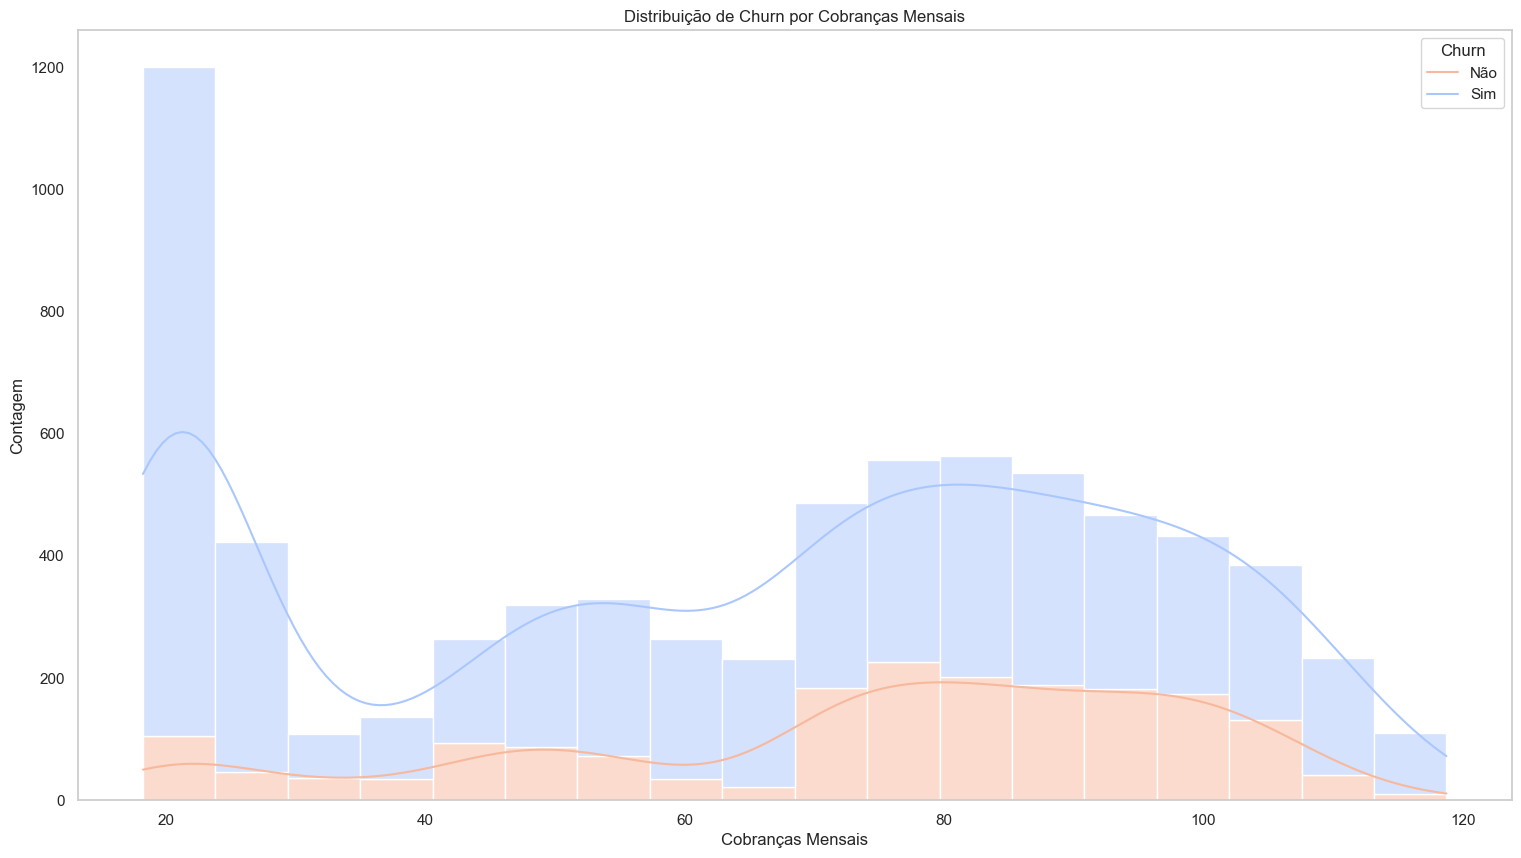

In [54]:
plt.figure(figsize=(18.5, 10))

# Histograma da distribuição das cobranças mensais por churn
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', multiple='stack', palette='coolwarm', kde=True)

# Personalização do gráfico
plt.title('Distribuição de Churn por Cobranças Mensais')
plt.xlabel('Cobranças Mensais')
plt.ylabel('Contagem')
plt.legend(title='Churn', loc='upper right', labels=['Não', 'Sim'])
plt.grid(False)
plt.show()

**Análise:** Neste outro gráfico, apresentamos uma análise dos contratos de internet em relação às cobranças mensais, com destaque para o plano de internet no valor de 1.200. Observamos que este plano se destaca em termos de cobranças mensais, sugerindo uma possível preferência dos assinantes por esse pacote específico de serviços.

Além de destacar o plano de internet de 1.200, podemos explorar outras características dos diferentes planos de internet oferecidos pela operadora. Por exemplo, podemos analisar a distribuição das cobranças mensais para diferentes faixas de preço de planos de internet, o que nos permitiria identificar padrões de consumo e preferências dos assinantes.

Também podemos investigar se a preferência por determinados planos de internet está relacionada a características demográficas dos assinantes, como idade, renda ou localização geográfica. Isso nos ajudaria a entender melhor as necessidades e expectativas dos clientes e a adaptar nossas ofertas de planos de internet para atender às suas demandas específicas.

Ao compreender esses padrões e determinantes subjacentes, podemos desenvolver estratégias mais eficazes para promover os planos de internet mais populares, aumentar a satisfação do cliente e impulsionar o crescimento do negócio.

# Conclusão

Nessa análise de dados abrangente, exploramos uma variedade de indicadores-chave relacionados aos serviços de internet oferecidos pela operadora, incluindo tipos de plano, características demográficas dos assinantes e padrões de contratação. Os insights obtidos fornecem uma visão detalhada das preferências e comportamentos dos clientes, destacando áreas de oportunidade e orientando estratégias futuras.

Primeiramente, observamos uma clara preferência dos clientes por planos de internet de fibra ótica em comparação com os planos DSL, que representam uma tecnologia mais antiga com velocidades de internet mais baixas. Essa preferência por fibra ótica sugere uma demanda crescente por velocidades de internet mais rápidas e confiáveis, possivelmente impulsionada pelo aumento do consumo de conteúdo em streaming, jogos online e outras atividades de alta largura de banda.

Além disso, identificamos a variável alvo para um potencial modelo de machine learning: a variável binária que indica se um cliente cancelou (1) ou não cancelou (0) o serviço. Essa variável é crucial para prever o churn, ou seja, antecipar se um cliente está propenso a cancelar o serviço no futuro. A capacidade de prever o churn permite à operadora tomar medidas proativas para reter clientes, melhorar a experiência do usuário e garantir a sustentabilidade do negócio.

Durante a análise, também destacamos a importância de extrair insights significativos sobre as preferências dos clientes em relação aos planos de internet. Observamos que os clientes tendem a procurar planos com maior velocidade de internet, seja para atividades de entretenimento como assistir streaming de TV ou para fins mais práticos, como trabalho remoto e educação online. As velocidades oferecidas pela fibra ótica, por sua vez, demonstraram uma aderência mais forte em comparação com tecnologias mais lentas, como DSL, ADSL e Cable.

Concluímos, portanto, que esta análise de dados é fundamental para orientar as estratégias de negócio da operadora. Os insights obtidos permitem uma compreensão mais profunda das necessidades e preferências dos clientes, possibilitando o desenvolvimento de planos de internet mais alinhados com suas expectativas. Além disso, a capacidade de prever o churn através de modelos de machine learning oferece uma oportunidade única para a operadora agir de forma proativa na retenção de clientes e na maximização da satisfação do usuário. Em última análise, essa abordagem baseada em dados é essencial para impulsionar o crescimento sustentável do negócio e garantir sua competitividade no mercado em constante evolução.